# Install packages

In [ ]:
# !pip install neo
# !pip install matplotlib_scalebar
# !pip install ffmpeg
# !pip install Ipython --upgrade
# %load_ext autoreload
# %autoreload 2

In [ ]:
## if using google drive

# from google.colab import drive # import drive from google colab
# drive.mount("/content/drive") 
# %cd /content/drive/MyDrive/ff_repo/Multifirefly-Project

# Import packages

In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

import sys

from data_wrangling import specific_utils, process_monkey_information, base_processing_class, combine_info_utils, general_utils
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, add_features_GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curv_of_traj_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class, prep_ml_data_utils
from reinforcement_learning.base_classes import env_utils, base_env, more_envs, rl_base_class, rl_base_utils
from reinforcement_learning.agents.rnn import gru_utils, lstm_utils
from reinforcement_learning.agents.feedforward import interpret_neural_network, sb3_class, sb3_utils
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_utils
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_time_series, plotly_preparation, plotly_for_correlation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils
from planning_analysis.only_cur_ff import only_cur_ff_utils, only_cur_ff_class, only_cur_ff_utils
from planning_analysis.plan_factors import plan_factors_utils, build_factor_comp, plan_factors_class, monkey_plan_factors_x_sess_class, feature_lists
from planning_analysis.agent_analysis import compare_monkey_and_agent_utils, agent_plan_factors_class, agent_plan_factors_x_sess_class
from planning_analysis.plan_factors import test_vs_control_utils
from planning_analysis.factors_vs_indicators import make_variations_utils, process_variations_utils
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils, examine_null_arcs
from planning_analysis.show_planning.cur_vs_nxt_ff import cvn_helper_class, find_cvn_utils, plot_cvn_class, plot_cvn_utils, plot_monkey_heading_helper_class, cvn_from_ref_class
from machine_learning.ml_methods import ml_methods_class, prep_ml_data_utils
from eye_position_analysis import eye_positions
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_utils, cca_cv_utils, cca_class
from planning_analysis.plan_indicators import plan_indicator_utils

from importlib import reload
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import mannwhitneyu

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exp

In [ ]:
monkey_name = 'monkey_Bruno'
opt_arc_type = 'opt_arc_stop_closest'
ref_point_mode = 'distance'
ref_point_value = -100
curv_traj_window_before_stop = [-25, 0]
combd_heading_df_x_sessions_exists_ok = True
heading_info_df_exists_ok = True
sp = show_planning_class.ShowPlanning(monkey_name=monkey_name,
                                            opt_arc_type=opt_arc_type)
sp.test_heading_info_df, sp.ctrl_heading_info_df = sp.make_or_retrieve_combd_heading_df_x_sessions_from_both_test_and_control(ref_point_mode, ref_point_value,
                                                                                                                                        curv_traj_window_before_stop=curv_traj_window_before_stop,
                                                                                                                                        combd_heading_df_x_sessions_exists_ok=combd_heading_df_x_sessions_exists_ok,
                                                                                                                                        show_printed_output=True, heading_info_df_exists_ok=heading_info_df_exists_ok,
                                                                        

In [ ]:
    def _make_combd_heading_df_x_sessions(self, test_or_control='test',
                                          ref_point_mode='distance', ref_point_value=-100,
                                          curv_traj_window_before_stop=[
                                              -25, 0],
                                          stops_near_ff_df_exists_ok=True, heading_info_df_exists_ok=True,
                                          sessions_df_for_one_monkey=None,
                                          use_curv_to_ff_center=False):
        ref_point_mode = ref_point_mode
        ref_point_value = ref_point_value
        curv_traj_window_before_stop = curv_traj_window_before_stop

        if sessions_df_for_one_monkey is not None:
            sessions_df_for_one_monkey = sessions_df_for_one_monkey
        else:
            sessions_df_for_one_monkey = combine_info_utils.make_sessions_df_for_one_monkey(
                raw_data_dir_name, monkey_name)

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            for index, row in sessions_df_for_one_monkey.iterrows():
                if row['finished'] is True:
                    continue
                print(
                    f'Making heading_info_df for: {row["monkey_name"]} {row["data_name"]}')
                heading_info_df = _make_heading_info_df_for_a_data_session(row['monkey_name'], row['data_name'], ref_point_mode=ref_point_mode,
                                                                                     ref_point_value=ref_point_value, test_or_control=test_or_control,
                                                                                     curv_traj_window_before_stop=curv_traj_window_before_stop,
                                                                                     stops_near_ff_df_exists_ok=stops_near_ff_df_exists_ok, heading_info_df_exists_ok=heading_info_df_exists_ok,
                                                                                     use_curv_to_ff_center=use_curv_to_ff_center,
                                                                                     merge_diff_in_curv_df_to_heading_info=False,
                                                                                     )
                heading_info_df['data_name'] = row['data_name']
                combd_heading_df_x_sessions = pd.concat(
                    [combd_heading_df_x_sessions, heading_info_df], axis=0)
                combd_diff_in_curv_df = pd.concat(
                    [combd_diff_in_curv_df, snf.diff_in_curv_df], axis=0)
                sessions_df_for_one_monkey.loc[sessions_df_for_one_monkey['data_name']
                                                    == row['data_name'], 'finished'] = True
        return combd_heading_df_x_sessions

# exp 2

In [2]:

ref_point_params = monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode
monkeys=['monkey_Schro', 'monkey_Bruno']
verbose=True
kwargs = {}

for monkey_name in monkeys:
    variations_list = specific_utils.init_variations_list_func(
        ref_point_params,
        monkey_name=monkey_name
    )
    
    for _, row in variations_list.iterrows():
        ref_point_mode = row['ref_point_mode']
        ref_point_value = row['ref_point_value']
        if verbose:
            print(row)
        
        # Initialize sessions
        planner = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name=monkey_name)
        planner.initialize_monkey_sessions_df_for_one_monkey()
        planner.get_test_and_ctrl_heading_info_df_across_sessions(
            ref_point_mode=ref_point_mode,
            ref_point_value=ref_point_value,
            save_data=False,
            **kwargs
        )
        
        
        break

ref_point_mode         distance
ref_point_value            -150
monkey_name        monkey_Schro
stored                    False
Name: 0, dtype: object
Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/opt_arc_stop_closest/control/Schro_dist_-150
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/opt_arc_stop_closest/control/dist_-150_window_-25cm_0cm
Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/opt_arc_stop_closest/test/Schro_dist_-150
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/opt_arc_stop_closest/test/dist_-150_window_-25cm_0cm
ref_point_mode         distance
ref_point_value            -140
monkey_name      

In [ ]:
planner.test_heading_info_df['data_name']

0       data_0219
1       data_0219
2       data_0219
3       data_0219
4       data_0219
          ...    
8002    data_0402
8003    data_0402
8004    data_0402
8005    data_0402
8006    data_0402
Name: data_name, Length: 8007, dtype: object

In [ ]:
per_sess_median_info = pd.DataFrame()
for data_name in planner.test_heading_info_df['data_name'].unique():
    print(f'Processing data_name: {data_name}')
    session_test_heading_info_df = planner.test_heading_info_df[planner.test_heading_info_df['data_name'] == data_name]
    session_ctrl_heading_info_df = planner.ctrl_heading_info_df[planner.ctrl_heading_info_df['data_name'] == data_name]
    
    session_median_info = make_variations_utils.make_pooled_median_info_from_test_and_ctrl_heading_info_df(session_test_heading_info_df,
                                                                                                    session_ctrl_heading_info_df, verbose=False)

    session_median_info['data_name'] = data_name
    per_sess_median_info = pd.concat([per_sess_median_info, session_median_info], axis=0)

per_sess_median_info['ref_point_mode'] = ref_point_mode
per_sess_median_info['ref_point_value'] = ref_point_value

2025-08-18 17:58:52,228 - INFO - Make all median info from test and ctrl heading info df, based on various combinations of factors...


2025-08-18 17:58:53,625 - INFO - Make all median info from test and ctrl heading info df, based on various combinations of factors...
2025-08-18 17:58:54,322 - INFO - Make all median info from test and ctrl heading info df, based on various combinations of factors...
2025-08-18 17:58:54,815 - INFO - Make all median info from test and ctrl heading info df, based on various combinations of factors...
2025-08-18 17:58:55,268 - INFO - Make all median info from test and ctrl heading info df, based on various combinations of factors...
2025-08-18 17:58:55,960 - INFO - Make all median info from test and ctrl heading info df, based on various combinations of factors...
2025-08-18 17:58:56,212 - INFO - Make all median info from test and ctrl heading info df, based on various combinations of factors...
2025-08-18 17:58:56,613 - INFO - Make all median info from test and ctrl heading info df, based on various combinations of factors...
2025-08-18 17:58:56,984 - INFO - Make all median info from tes

In [12]:
# Map data_name to sequential session_id
unique_data_names = np.sort(per_sess_median_info['data_name'].unique())
data_name_to_id = {name: i for i, name in enumerate(unique_data_names)}
per_sess_median_info['session_id'] = per_sess_median_info['data_name'].map(data_name_to_id)
per_sess_median_info

,diff_in_angle_to_nxt_ff_Q1,diff_in_abs_angle_to_nxt_ff_Q1,diff_in_abs_d_curv_Q1,diff_in_angle_to_nxt_ff_median,diff_in_abs_angle_to_nxt_ff_median,diff_in_abs_d_curv_median,diff_in_angle_to_nxt_ff_Q3,diff_in_abs_angle_to_nxt_ff_Q3,diff_in_abs_d_curv_Q3,test_or_control,...,whether_even_out_dist,whether_limit_cur_ff_cluster_50_size,if_test_nxt_ff_group_appear_after_stop,if_ctrl_nxt_ff_group_appear_after_stop,ctrl_flash_compared_to_test,max_curv_range,data_name,ref_point_mode,ref_point_value,session_id
0,-96.50341,-132.86567,-3.38057,130.81032,92.92930,4.74115,380.47387,321.67360,18.83806,test,...,False,False,ff_must_seen_after_stop,flexible,flexible,200,data_0219,distance,-40,0
1,-148.98552,-79.22629,-2.13385,94.42275,125.19209,8.25600,430.34983,459.21213,22.93568,control,...,False,False,ff_must_seen_after_stop,flexible,flexible,200,data_0219,distance,-40,0
2,-364.36912,-62.05320,0.16836,-56.30825,255.07143,14.58362,375.10088,514.95589,32.77338,test,...,False,False,ff_no_seen_after_stop,flexible,flexible,200,data_0219,distance,-40,0
3,-148.98552,-79.22629,-2.13385,94.42275,125.19209,8.25600,430.34983,459.21213,22.93568,control,...,False,False,ff_no_seen_after_stop,flexible,flexible,200,data_0219,distance,-40,0
4,-144.05784,-127.92705,-2.89335,106.14837,105.91558,5.76587,380.44191,377.73944,22.63364,test,...,False,False,flexible,flexible,flexible,200,data_0219,distance,-40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,-48.66614,-173.80780,-7.04309,230.73103,95.74941,4.60573,439.61229,406.28081,23.72234,control,...,False,False,ff_must_seen_after_stop,flexible,flexible,200,data_0402,distance,-40,24
2,-132.69858,-128.93934,-3.30025,166.90993,216.02107,7.71479,364.85328,364.85328,22.15537,test,...,False,False,ff_no_seen_after_stop,flexible,flexible,200,data_0402,distance,-40,24
3,-48.66614,-173.80780,-7.04309,230.73103,95.74941,4.60573,439.61229,406.28081,23.72234,control,...,False,False,ff_no_seen_after_stop,flexible,flexible,200,data_0402,distance,-40,24
4,-113.10986,-132.86312,-6.67899,180.29776,126.51897,6.08640,438.18869,415.48782,26.44386,test,...,False,False,flexible,flexible,flexible,200,data_0402,distance,-40,24


In [ ]:
def make_pooled_median_info_from_session(session_test_heading_info_df, session_ctrl_heading_info_df):
    

In [ ]:
pooled_median_info = make_variations_utils.make_pooled_median_info_from_test_and_ctrl_heading_info_df(test_heading_info_df,
                                                                                                      ctrl_heading_info_df, verbose=verbose)
pooled_median_info['ref_point_mode'] = ref_point_mode
pooled_median_info['ref_point_value'] = ref_point_value
time_calibration = {'ref_point_mode': ref_point_mode,
                        'ref_point_value': ref_point_value, 'monkey_name': monkey_name}
pooled_median_info.attrs.update(time_calibration)


os.makedirs(pooled_median_info_folder_path, exist_ok=True)
pooled_median_info.to_csv(df_path)
print('Stored new pooled_median_info in ',
      pooled_median_info_folder_path)

In [ ]:
            pooled_perc_info = make_variations_utils.make_pooled_perc_info_from_test_and_ctrl_heading_info_df(test_heading_info_df,
                                                                                                             ctrl_heading_info_df, verbose=verbose)

            if save_data:
                pooled_perc_info.to_csv(pooled_perc_info_path)
            print('Stored new pooled_perc_info in ', pooled_perc_info_path)

        pooled_perc_info['monkey_name'] = monkey_name
        pooled_perc_info['opt_arc_type'] = opt_arc_type

        if process_info_for_plotting:
            process_pooled_perc_info_to_plot_direction()

In [ ]:

# ref_point_params = monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode
# monkeys=['monkey_Schro', 'monkey_Bruno']
# verbose=True

# for monkey_name in monkeys:
#     variations_list = specific_utils.init_variations_list_func(
#         ref_point_params,
#         monkey_name=monkey_name
#     )
    
#     for _, row in variations_list.iterrows():
#         ref_point_mode = row['ref_point_mode']
#         ref_point_value = row['ref_point_value']
#         if verbose:
#             print(row)
        
#         # Initialize sessions
#         planner = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name=monkey_name)
#         planner.initialize_monkey_sessions_df_for_one_monkey()
#         planner.get_test_and_ctrl_heading_info_df_across_sessions(
#             ref_point_mode=ref_point_mode,
#             ref_point_value=ref_point_value,
#             save_data=False,
#             **kwargs
#         )
        
        # Process test and control data
        test_df = build_factor_comp.process_heading_info_df(
            planner.test_heading_info_df.copy()
        )
        ctrl_df = build_factor_comp.process_heading_info_df(
            planner.ctrl_heading_info_df.copy()
        )
        
        # Filter NaNs for d_curv column
        test_df_clean, ctrl_df_clean = filter_and_report_nan(
            test_df, ctrl_df, col_name='diff_in_abs_angle_to_nxt_ff'
        )
        
        # Run angle test directly on raw data (assumed no filtering needed)
        angle_p = test_angle_func(
            test_df_clean['diff_in_abs_angle_to_nxt_ff'].values,
            ctrl_df_clean['diff_in_abs_angle_to_nxt_ff'].values
        )
        
        # Filter NaNs for d_curv column
        test_df_clean, ctrl_df_clean = filter_and_report_nan(
            test_df, ctrl_df, col_name='diff_in_abs_d_curv'
        )

        # Run d_curv test on cleaned data
        d_curv_p = test_d_curv_func(
            test_df_clean['diff_in_abs_d_curv'].values,
            ctrl_df_clean['diff_in_abs_d_curv'].values
        )

        # get dir_from_cur_ff_same_side
        build_factor_comp.add_dir_from_cur_ff_same_side(test_df)
        build_factor_comp.add_dir_from_cur_ff_same_side(ctrl_df)

        
        # Filter NaNs for d_dir column
        test_df_clean, ctrl_df_clean = filter_and_report_nan(
            test_df, ctrl_df, col_name='dir_from_cur_ff_same_side'
        )
        
        # Run d_dir test on cleaned data
        d_dir_p = test_d_dir_func(
            test_df['dir_from_cur_ff_same_side'].values,
            ctrl_df['dir_from_cur_ff_same_side'].values
        )
        
        # Collect results
        results.append({
            'monkey_name': monkey_name,
            'ref_point_mode': ref_point_mode,
            'ref_point_value': ref_point_value,
            'angle_p_value': angle_p,
            'd_curv_p_value': d_curv_p,
            'd_dir_p_value': d_dir_p,
            'd_dir_test_sample_size': len(test_df_clean),
            'd_dir_ctrl_sample_size': len(ctrl_df_clean),
        })

return pd.DataFrame(results)

# exp3

In [ ]:
from arch.bootstrap import IIDBootstrap
bs = IIDBootstrap(x)
ci = bs.conf_int(np.median, reps=10000, method='bca')


# Get data

## all sessions of data

In [3]:
ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Schro')
ps.initialize_monkey_sessions_df_for_one_monkey()
ps.get_test_and_ctrl_heading_info_df_across_sessions(
                        ref_point_mode='distance', ref_point_value=-100,
                        save_data=False)

test_heading_info_df = ps.test_heading_info_df.copy()
ctrl_heading_info_df = ps.ctrl_heading_info_df.copy()
test_heading_info_df = build_factor_comp.process_heading_info_df(test_heading_info_df)
ctrl_heading_info_df = build_factor_comp.process_heading_info_df(ctrl_heading_info_df)


Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/opt_arc_stop_closest/control/Schro_dist_-100
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/opt_arc_stop_closest/control/dist_-100_window_-25cm_0cm
Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/opt_arc_stop_closest/test/Schro_dist_-100
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/opt_arc_stop_closest/test/dist_-100_window_-25cm_0cm


## one session data

In [42]:
snf.heading_info_df

,stop_point_index_x,stop_x,stop_y,stop_time,cur_ff_index,cur_ff_x,cur_ff_y,cur_ff_cluster_50_size,point_index_before_stop,monkey_angle_before_stop,...,curv_from_stop_to_nxt_ff,opt_curv_to_cur_ff,curv_from_cur_end_to_nxt_ff,d_curv_null_arc,d_curv_monkey,abs_d_curv_null_arc,abs_d_curv_monkey,diff_in_d_curv,diff_in_abs_d_curv,stop_point_index_y
0,1803,-177.51782,578.28235,29.91236,3,-173.86020,570.16726,2,1800,-0.08995,...,0.00147,0.00676,0.00360,-18.14806,-17.24953,18.14806,17.24953,-0.89853,0.89853,1803.00000
1,1973,14.10295,571.15594,32.70143,4,19.38538,574.25525,3,1970,0.21726,...,-0.00000,0.00075,0.00075,0.00000,-19.92783,0.00000,19.92783,19.92783,-19.92783,1973.00000
2,2406,194.21715,151.10434,39.82266,6,188.23028,144.18494,1,2405,-1.64135,...,-0.00167,-0.00076,-0.00223,-8.43939,-18.22697,8.43939,18.22697,9.78759,-9.78759,2406.00000
3,2501,147.94513,-17.32795,41.36644,8,147.79549,-10.17151,3,2499,-1.83263,...,0.00667,NaN,NaN,NaN,26.34203,NaN,26.34203,NaN,NaN,2501.00000
4,2982,111.97349,-652.88080,49.21810,13,111.75989,-652.07676,1,2980,-2.12276,...,-0.00086,-0.00236,-0.00115,6.94677,-18.19687,6.94677,18.19687,25.14363,-11.25010,2982.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,213169,726.26276,275.97107,3505.10723,1185,714.06256,289.96019,1,213166,-1.36836,...,0.00286,-0.00201,0.00254,26.08535,22.34214,26.08535,22.34214,3.74321,3.74321,213169.00000
384,214069,497.93689,-181.95702,3519.94710,1190,492.61875,-182.31072,2,214067,2.19632,...,0.00375,-0.00041,0.00131,9.84300,33.67091,9.84300,33.67091,-23.82792,-23.82792,214069.00000
385,216067,-290.01459,-189.72852,3552.86486,1198,-287.75004,-189.89936,1,216066,-1.01947,...,0.00143,-0.00000,0.00000,0.01146,0.00000,0.01146,0.00000,0.01146,0.01146,216067.00000
386,217211,-602.95166,516.29071,3571.63877,1205,-602.07191,532.77152,1,217209,0.26316,...,0.00323,0.00208,0.00307,5.69083,-5.45531,5.69083,5.45531,11.14614,0.23552,217211.00000


In [41]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

kwargs = {
    'ref_point_mode': 'time after cur ff visible', # 'distance',
    'ref_point_value': 0.1, #-150,
    'deal_with_rows_with_big_ff_angles': True,
    'remove_i_o_modify_rows_with_big_ff_angles': False,
}

add_kwargs = {
    'curv_of_traj_mode': 'distance',
    'window_for_curv_of_traj': [-25, 0],
    'truncate_curv_of_traj_by_time_of_capture': True,
}

#data_item_info = find_cvn_utils.extract_key_info_from_data_item_for_stops_near_ff_class(data_item)

snf = cvn_from_ref_class.CurVsNxtFfFromRefClass(raw_data_folder_path=raw_data_folder_path)
snf.get_more_monkey_data()
snf.traj_curv_descr = 'Traj Curv: From Current Point to Right Before Stop'

snf.streamline_organizing_info(**kwargs, **add_kwargs, test_or_control='test')
test_heading_info_df = snf.heading_info_df.copy()

# also need to make heading info df for control
snf.make_heading_info_df_without_long_process(**kwargs, test_or_control='control')
ctrl_heading_info_df = snf.heading_info_df.copy()

test_heading_info_df = build_factor_comp.process_heading_info_df(test_heading_info_df)
ctrl_heading_info_df = build_factor_comp.process_heading_info_df(ctrl_heading_info_df)

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0328/ff_dataframe.h5
Removed 0 rows out of 728 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 728 rows
Retrieving shared_stops_near_ff_df succeeded
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=True`, some rows may still be removed (e.g., negative ff_y_relative). Use this function mainly for curvature calculation.
[Warning] 4.786% of ff_x_relative > ff_y_relative. Will be modified instead.
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=True`, some rows may still be removed (e.g., negative ff_y_relative). U

KeyError: "['stop_point_index'] not in index"

# Wilcoxon

## all ref points

In [7]:
wilcoxon_df = plan_indicator_utils.run_tests_over_monkeys(
    test='wilcoxon',
    ref_point_params=monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode,
    curv_traj_window_before_stop=[-25, 0],
    opt_arc_type='opt_arc_stop_first_vis_bdry'
)
wilcoxon_df

ref_point_mode         distance
ref_point_value            -150
monkey_name        monkey_Schro
stored                    False
Name: 0, dtype: object
Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/opt_arc_stop_first_vis_bdry/control/Schro_dist_-150
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/opt_arc_stop_first_vis_bdry/control/dist_-150_window_-25cm_0cm
Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/opt_arc_stop_first_vis_bdry/test/Schro_dist_-150
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/opt_arc_stop_first_vis_bdry/test/dist_-150_window_-25cm_0cm
test_df dropped 0 out of 2054 rows (0.00%) due to NaN

,monkey_name,ref_point_mode,ref_point_value,angle_p_value,d_curv_p_value,d_dir_p_value,d_dir_test_sample_size,d_dir_ctrl_sample_size
0,monkey_Schro,distance,-150,0.00001,0.00001,0.00672,2054,1806
1,monkey_Schro,distance,-140,0.00008,0.00009,0.00635,2054,1807
2,monkey_Schro,distance,-130,0.00001,0.00018,0.00639,2055,1808
3,monkey_Schro,distance,-120,0.00002,0.00123,0.00606,2057,1811
4,monkey_Schro,distance,-110,0.00039,0.00090,0.00655,2058,1814
5,monkey_Schro,distance,-100,0.00540,0.00124,0.00669,2059,1813
6,monkey_Schro,distance,-90,0.02117,0.00627,0.00632,2059,1814
7,monkey_Schro,distance,-80,0.10466,0.15911,0.00655,2058,1814
8,monkey_Schro,distance,-70,0.22108,0.39272,0.00628,2058,1813
9,monkey_Schro,distance,-60,0.12975,0.32432,0.00599,2057,1811


## one ref point 

In [26]:
x = test_heading_info_df['diff_in_abs_angle_to_nxt_ff'].values
y = ctrl_heading_info_df['diff_in_abs_angle_to_nxt_ff'].values
_, p = mannwhitneyu(x, y, alternative='greater')
p

np.float64(0.00027354876592776905)

# Perm test

## all ref points

In [8]:
perm_df = plan_indicator_utils.run_tests_over_monkeys(
    test='permutation',
    ref_point_params=monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode,
    curv_traj_window_before_stop=[-25, 0],
    num_permutations=10000,
    opt_arc_type='norm_opt_arc'
)
perm_df

ref_point_mode         distance
ref_point_value            -150
monkey_name        monkey_Schro
stored                    False
Name: 0, dtype: object
Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/norm_opt_arc/control/Schro_dist_-150
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/norm_opt_arc/control/dist_-150_window_-25cm_0cm
Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/norm_opt_arc/test/Schro_dist_-150
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/norm_opt_arc/test/dist_-150_window_-25cm_0cm
test_df dropped 0 out of 2054 rows (0.00%) due to NaN in diff_in_abs_angle_to_nxt_ff
ctrl_df dropped 0 out of 180

,monkey_name,ref_point_mode,ref_point_value,angle_p_value,d_curv_p_value,d_dir_p_value,d_dir_test_sample_size,d_dir_ctrl_sample_size
0,monkey_Schro,distance,-150,0.00000,0.00030,0.00650,2054,1806
1,monkey_Schro,distance,-140,0.00030,0.00100,0.00780,2054,1807
2,monkey_Schro,distance,-130,0.00040,0.00070,0.00810,2055,1808
3,monkey_Schro,distance,-120,0.00010,0.00750,0.00780,2057,1811
4,monkey_Schro,distance,-110,0.00170,0.00160,0.00770,2058,1814
5,monkey_Schro,distance,-100,0.01200,0.00230,0.00520,2059,1813
6,monkey_Schro,distance,-90,0.00720,0.01030,0.00550,2059,1814
7,monkey_Schro,distance,-80,0.07790,0.15600,0.00700,2058,1814
8,monkey_Schro,distance,-70,0.17280,0.39520,0.00610,2058,1813
9,monkey_Schro,distance,-60,0.13730,0.23980,0.00610,2057,1811


## one ref point 

In [ ]:
x = test_heading_info_df['diff_in_abs_angle_to_nxt_ff'].values
y = ctrl_heading_info_df['diff_in_abs_angle_to_nxt_ff'].values
plan_indicator_utils.permutation_test(x, y, num_permutations=10000, alternative='greater', random_state=None)

percentage of nan in x: 0.0
percentage of nan in y: 0.0
Removing nan...
observed_diff: 0.6780804241116667
perm_diff: -0.09137367742781066
perm_diff: -0.30698768408575217
count: 54, num_permutations: 10000, p_value: 0.0054


0.0054

In [ ]:
x = test_heading_info_df['diff_in_abs_d_curv'].values
y = ctrl_heading_info_df['diff_in_abs_d_curv'].values
plan_indicator_utils.permutation_test(x, y, num_permutations=10000, alternative='greater', random_state=None)

percentage of nan in x: 0.064
percentage of nan in y: 0.216
Removing nan...
observed_diff: 3.0745805527151937
perm_diff: 2.4513786048159067
perm_diff: 1.9099424168089207
count: 675, num_permutations: 10000, p_value: 0.0675


0.0675

In [ ]:
build_factor_comp.add_dir_from_cur_ff_same_side(test_heading_info_df)
build_factor_comp.add_dir_from_cur_ff_same_side(ctrl_heading_info_df)

x = test_heading_info_df['dir_from_cur_ff_same_side'].values
y = ctrl_heading_info_df['dir_from_cur_ff_same_side'].values
plan_indicator_utils.permutation_test(x, y, num_permutations=10000, alternative='greater', random_state=None, statistic='mean')

percentage of nan in x: 0.0
percentage of nan in y: 0.0
Removing nan...
observed_diff: 0.041982708649375367
perm_diff: -0.020596687263353952
perm_diff: -0.004686671353338001
perm_diff: 0.017587350920684308
perm_diff: -0.0015046681713348775
perm_diff: -0.02483935817269145
perm_diff: 0.0006166672833339826
perm_diff: -0.007868674535341236
perm_diff: 0.04092204092204088
perm_diff: -0.016354016354016343
perm_diff: 0.023951357284690666
perm_diff: 0.0027380027380028427
perm_diff: 0.019708686375353057
perm_diff: 0.008041341374674715
perm_diff: 0.01122334455667795
perm_diff: 0.021830021830021806
perm_diff: 0.019708686375353057
perm_diff: 0.03455803455803452
perm_diff: -0.030142696809363545
perm_diff: 0.00910200910200909
perm_diff: 0.015466015466015448
count: 50, num_permutations: 10000, p_value: 0.005


0.005

# Plot var of interest

Looking back at this after some time, I believe the purpose of this section is to show that, in test cases, the parameter of interest (such as diff_in_abs_angle_to_nxt_ff) tends to be more skewed to the right compared to control cases. This is important because higher values of this parameter provide stronger evidence of planning behavior.

In [ ]:
# planning indicators: diff_in_abs_angle_to_nxt_ff, diff_in_abs_d_curv, dir_from_cur_ff_same_side, dir_from_cur_ff_to_nxt_ff

## scatter + hist

### curv

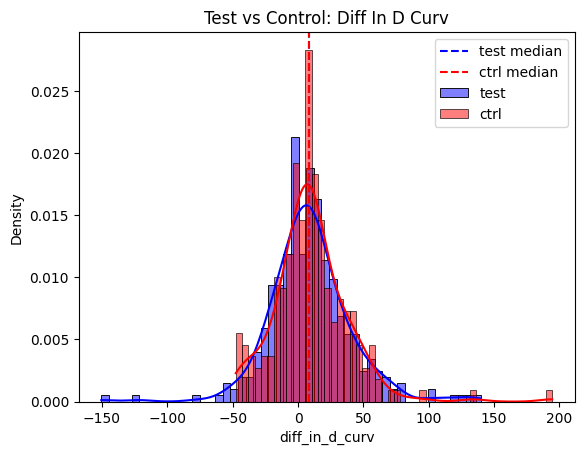

In [ ]:
arc_col = 'd_curv_null_arc'
monk_col = 'd_curv_monkey'
diff_col = 'diff_in_d_curv'
diff_in_abs_col = 'diff_in_abs_d_curv'
#plan_indicator_utils.plot_scatter_test_vs_ctrl(test_heading_info_df, ctrl_heading_info_df, arc_col, monk_col, diff_col, diff_in_abs_col)
plan_indicator_utils.plot_hist_test_vs_ctrl(test_heading_info_df, ctrl_heading_info_df, arc_col, monk_col, diff_col, diff_in_abs_col)

### heading

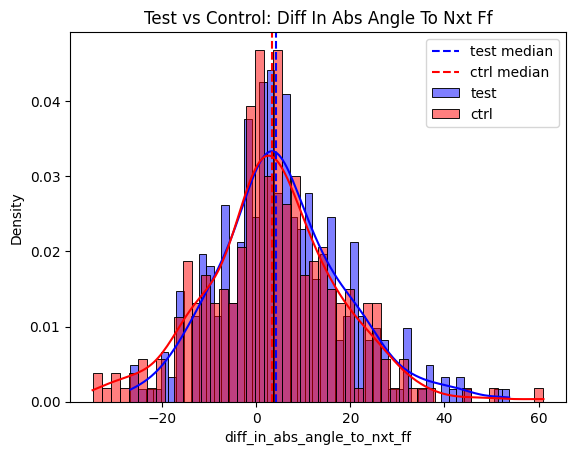

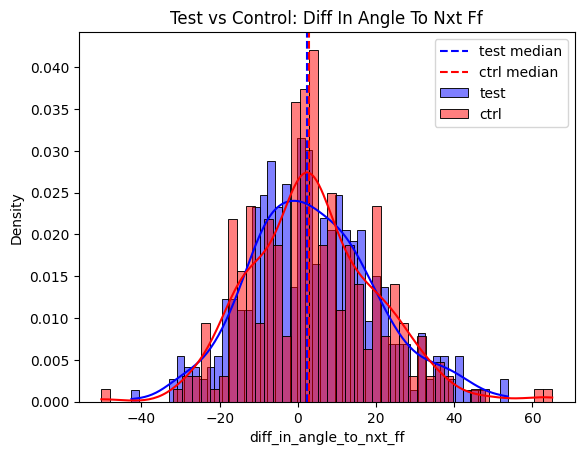

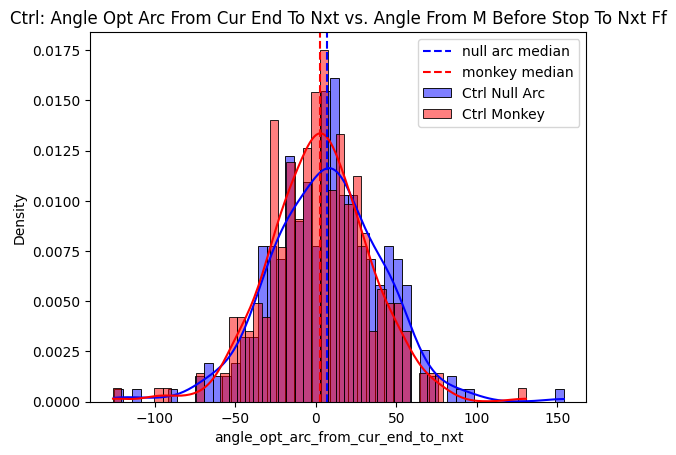

In [ ]:
arc_col = 'angle_opt_cur_end_to_nxt_ff'
monk_col = 'angle_from_stop_to_nxt_ff'
diff_col = 'diff_in_angle_to_nxt_ff'
diff_in_abs_col = 'diff_in_abs_angle_to_nxt_ff'
# plan_indicator_utils.plot_scatter_test_vs_ctrl(test_heading_info_df, ctrl_heading_info_df, arc_col, monk_col, diff_col, diff_in_abs_col)
plan_indicator_utils.plot_hist_test_vs_ctrl(test_heading_info_df, ctrl_heading_info_df, arc_col, monk_col, diff_col, diff_in_abs_col)

## cdf

In [ ]:
# plot a cumulative density distribution of test_heading_info_df['diff_in_abs_angle_to_nxt_ff']
def plot_cdf(test_heading_info_df, ctrl_heading_info_df, column='diff_in_abs_angle_to_nxt_ff', xlim=None):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    sns.ecdfplot(data=test_heading_info_df[column], ax=ax, label='test')
    sns.ecdfplot(data=ctrl_heading_info_df[column], ax=ax, label='ctrl')
    ax.axhline(y=0.5, color='black', linestyle='--')
    if xlim is not None:
        ax.set_xlim(xlim)
    ax.legend()
    plt.show()


plot_cdf(test_heading_info_df, ctrl_heading_info_df, column='diff_in_abs_angle_to_nxt_ff', xlim=[-20, 20])

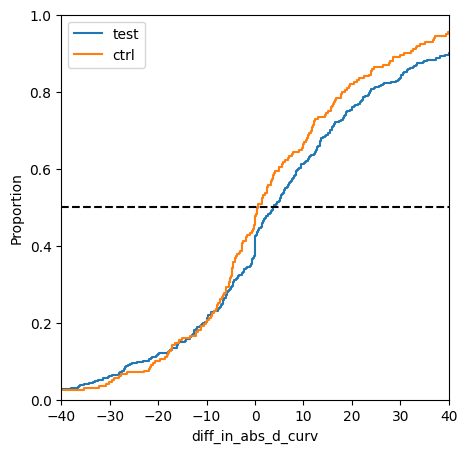

In [ ]:
plot_cdf(test_heading_info_df, ctrl_heading_info_df, column='diff_in_abs_d_curv', xlim=[-40, 40])

# Appendix

## directly retrieve files

In [ ]:
def temp_process(df):
    df['diff_in_angle_to_nxt_ff'] = df['angle_opt_arc_from_cur_end_to_nxt'] - \
        df['angle_from_m_before_stop_to_nxt_ff']
    df['diff_in_abs_angle_to_nxt_ff'] = np.abs(
        df['angle_opt_arc_from_cur_end_to_nxt']) - np.abs(df['angle_from_m_before_stop_to_nxt_ff'])
    return df

test_path = 'all_monkey_data/planning/monkey_Bruno/combined_data/cur_and_nxt/data/combd_heading_info/norm_opt_arc/test/Bruno_dist_100'
ctrl_path = 'all_monkey_data/planning/monkey_Bruno/combined_data/cur_and_nxt/data/combd_heading_info/norm_opt_arc/control/Bruno_dist_100'

test_df = pd.read_csv(test_path)
ctrl_df = pd.read_csv(ctrl_path)

test_df = temp_process(
    test_df
)
ctrl_df = temp_process(
    ctrl_df
)

test_df.head()
ctrl_df.head()

test_df['diff_in_abs_angle_to_nxt_ff'].values
ctrl_df['diff_in_abs_angle_to_nxt_ff'].values
# Perform permutation tests
angle_p = plan_indicator_utils.permutation_test(
    test_df['diff_in_abs_angle_to_nxt_ff'].values,
    ctrl_df['diff_in_abs_angle_to_nxt_ff'].values,
    num_permutations=10000,
    alternative='greater'
)
angle_p
stat, p = mannwhitneyu(test_df['diff_in_abs_angle_to_nxt_ff'].values, ctrl_df['diff_in_abs_angle_to_nxt_ff'].values, alternative='greater')
print(stat, p)

# Exp (PAST)

In [ ]:
build_factor_comp.add_dir_from_cur_ff_same_side(test_heading_info_df)
build_factor_comp.add_dir_from_cur_ff_same_side(ctrl_heading_info_df)

In [ ]:
test_perc = (test_heading_info_df['dir_from_cur_ff_to_stop'] ==
                test_heading_info_df['dir_from_cur_ff_to_nxt_ff']).sum()/len(test_heading_info_df)
ctrl_perc = (ctrl_heading_info_df['dir_from_cur_ff_to_stop'] ==
                ctrl_heading_info_df['dir_from_cur_ff_to_nxt_ff']).sum()/len(ctrl_heading_info_df)

In [ ]:
test_perc = (test_heading_info_df['dir_from_cur_ff_to_stop'] ==
                test_heading_info_df['dir_from_cur_ff_to_nxt_ff']).sum()/len(test_heading_info_df)
ctrl_perc = (ctrl_heading_info_df['dir_from_cur_ff_to_stop'] ==
                ctrl_heading_info_df['dir_from_cur_ff_to_nxt_ff']).sum()/len(ctrl_heading_info_df)

In [ ]:
for monkey_name in monkeys:
    variations_list = specific_utils.init_variations_list_func(
        ref_point_params,
        monkey_name=monkey_name
    )
    
    for _, row in variations_list.iterrows():
        ref_point_mode = row['ref_point_mode']
        ref_point_value = row['ref_point_value']
        if verbose:
            print(row)
        
        # Initialize sessions
        planner = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name=monkey_name)
        planner.initialize_monkey_sessions_df_for_one_monkey()
        planner.get_test_and_ctrl_heading_info_df_across_sessions(
            ref_point_mode=ref_point_mode,
            ref_point_value=ref_point_value,
            save_data=False
        )
        
        # Process test and control data
        test_df = build_factor_comp.process_heading_info_df(
            planner.test_heading_info_df.copy()
        )
        ctrl_df = build_factor_comp.process_heading_info_df(
            planner.ctrl_heading_info_df.copy()
        )
        
        # Filter NaNs for d_curv column
        test_df_clean, ctrl_df_clean = filter_and_report_nan(
            test_df, ctrl_df, col_name='diff_in_abs_angle_to_nxt_ff'
        )
        
        # Run angle test directly on raw data (assumed no filtering needed)
        angle_p = test_func_angle(
            test_df_clean['diff_in_abs_angle_to_nxt_ff'].values,
            ctrl_df_clean['diff_in_abs_angle_to_nxt_ff'].values
        )
        
        # Filter NaNs for d_curv column
        test_df_clean, ctrl_df_clean = filter_and_report_nan(
            test_df, ctrl_df, col_name='diff_in_abs_d_curv'
        )
        
        # Run d_curv test on cleaned data
        d_curv_p = test_func_d_curv(
            test_df_clean['diff_in_abs_d_curv'].values,
            ctrl_df_clean['diff_in_abs_d_curv'].values
        )
        
        # Collect results
        results.append({
            'monkey_name': monkey_name,
            'ref_point_mode': ref_point_mode,
            'ref_point_value': ref_point_value,
            'angle_p_value': angle_p,
            'd_curv_p_value': d_curv_p,
        })